In [1]:
## git clone https://github.com/CSSEGISandData/COVID-19.git


In [2]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [4]:
import pandas as pd

In [5]:
dd1 = pd.read_csv(path+d2)

In [6]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/29/20             int64
3/30/20             int64
3/31/20             int64
4/1/20              int64
4/2/20              int64
Length: 76, dtype: object

In [7]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [8]:
df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
df_0.loc[country[0], :] = df_0.sum()
data = df_0.T[4:]
data_0 = data.loc[lambda df: df[country[0]] >0]

#data['date'] = [ dateparse(i) for i in data.index ]
data_0['day'] = [ i for i,ii in enumerate(data_0.index) ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
len(data_0['day'])

12

In [10]:
data_0

,0,Afghanistan,day
3/22/20,1,1,0
3/23/20,1,1,1
3/24/20,1,1,2
3/25/20,2,2,3
3/26/20,4,4,4
3/27/20,4,4,5
3/28/20,4,4,6
3/29/20,4,4,7
3/30/20,4,4,8
3/31/20,4,4,9


In [11]:
country2 = []
for i in country[1:]:    
    df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
    df_1.loc[i, :] = df_1.sum()

    data1 = df_1.T[4:]
    data_1 = data1.loc[lambda df: df[i] >100]
    data_1['day'] = [ j for j,ii in enumerate(data_1.index) ]
    #data1['date'] = [ dateparse(j) for j in data1.index ]
    if len(data_1['day'])>0:    
        data_0 = data_0.merge(data_1, how='outer', on='day')
        country2.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
country2

['Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'Denmark',
 'Ecuador',
 'France',
 'Germany',
 'Indonesia',
 'Iran',
 'Italy',
 'Korea, South',
 'Netherlands',
 'Philippines',
 'Portugal',
 'Romania',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'US']

In [13]:
df = data_0[country2[1:]+['day']]

Text(0.5, 0, 'day (0 means the day in over than 100 people)')

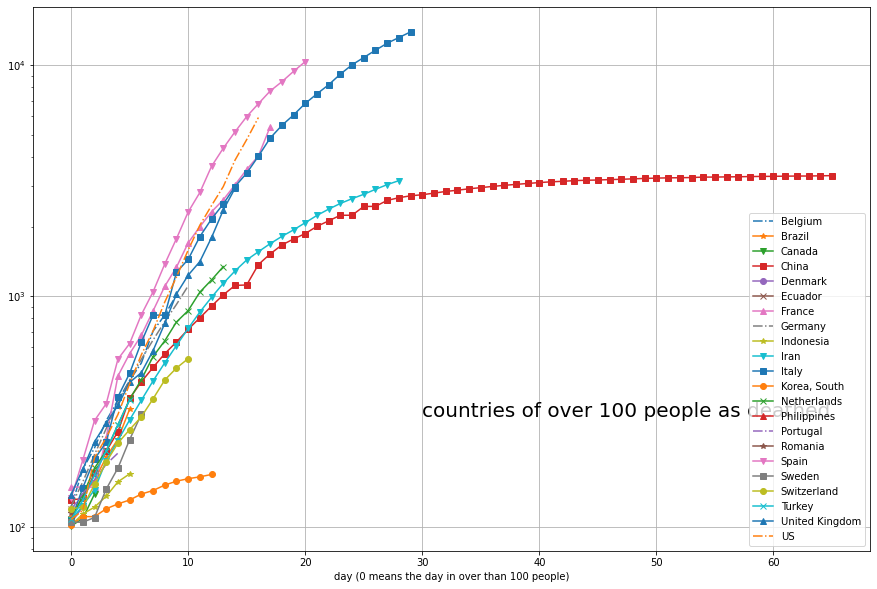

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = ["-.",'-*','-v','-s','-o','-x',"-^"]

for i,ii in enumerate(country2[1:]):
    df.plot(ax=ax, x="day",y=ii, style=maker[i%7])

#ax.get_legend().remove()
ax.grid(True)
ax.set_yscale('log')
plt.text(30, 3*10**2, "{}".format("countries of over 100 people as deathed"), fontsize=20)
ax.set_xlabel('day (0 means the day in over than 100 people)')
